## Aprendizaje Estadístico, Facultad de Ciencias Exactas y Naturales.

## Tarea Segunda:
Entrene 1000 instancias de de regresión lineal donde los datos para cada una de las instancias están definidos por:

`x = 2 * np.random.rand(100,1)`

`y = 4 + 3 * x + np.random.rand(100,1)`


De los estimados obtenidos para los parámetros de cada instancia de regresión, calcule el promedio y la desviación estándar, además grafique sus datos en un histograma y un diagrama de cajas.
Discuta sus resultados: el valor del promedio y la desviación estándar, la forma de la distribución resultante...

La forma de la función con la que se trabajará es entones:

$$
y = f(x) = 4 + 3x + \epsilon, \quad x \in [0,2)
$$

Donde $\epsilon$ es un valor real entre $[0,1)$ que se introduce aleatoriamente para simular un ruido aleatorio uniforme. 

In [1]:
# Importamos los paquetes necesarios
#Base
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

#SKLearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
sns.set(rc={"figure.figsize":(15,8)})

In [3]:
# definimos la función que entrena el modelo
# Devuelve 
def train(x,y):
    # ahora entrenamos el modelo
    model = LinearRegression().fit(x,y)
    return model

In [4]:
# La ecuacion tiene la forma y = A0 + A1*x
A0_L = [] # Lista para los interceptos
A1_L = [] # Lista para las pendientes

for i in range(1000):
    x = 2 * np.random.rand(100,1) # Un real positivo entre 0  y 2
    y = 4 + 3 * x + np.random.rand(100,1) # la función más un ruido real positivo entre 0 y 1
    linearregresion = train(x,y)
    a0, a1 = linearregresion.intercept_, linearregresion.coef_
    
    A0_L.append(a0)
    A1_L.append(a1)

Ahora graficaremos la distribución de cada uno de los parametros calculados para cada iteración.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Pendiente, A1')

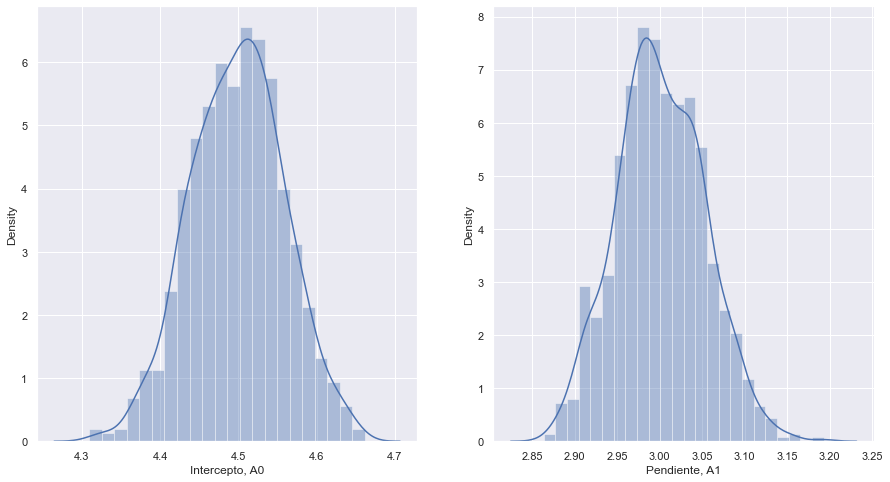

In [5]:
fig1, axs1 = plt.subplots(1,2)
sns.distplot(A0_L,ax=axs1[0])
sns.distplot(A1_L,ax=axs1[1])

axs1[0].set_xlabel('Intercepto, A0')
axs1[1].set_xlabel('Pendiente, A1')

<AxesSubplot:>

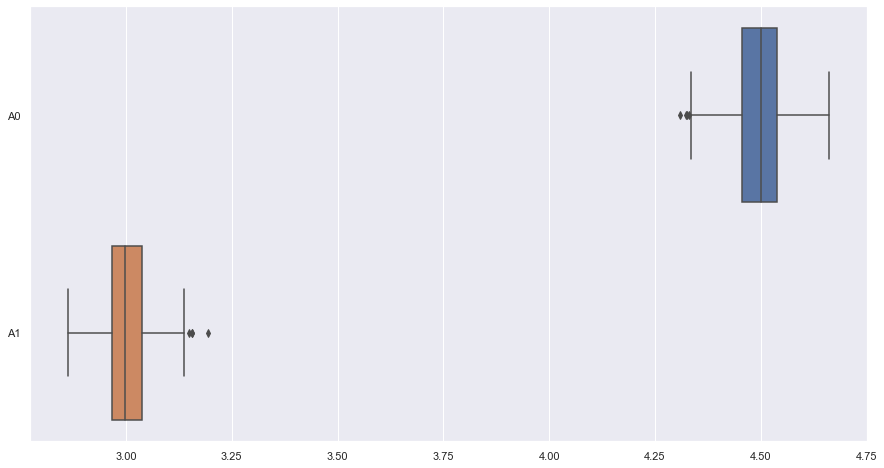

In [6]:
A0_L = np.array(A0_L).flatten()
A1_L = np.array(A1_L).flatten()

protodf = {"A0":A0_L, "A1":A1_L}
df1000 = pd.DataFrame(protodf)

sns.boxplot(data=df1000, orient="h")

Ahora calcularemos la media y la desviación estándar

In [9]:
muA0 = np.mean(A0_L)
muA1 = np.mean(A1_L)

sigmaA0 = np.std(A0_L)
sigmaA1 = np.std(A1_L)
print("La media del intercepto y la pendiente son respectivamente: μA0 = {0:.4}, μA1 = {1:.4}\n".format(muA0,muA1))
print("La desviación estándar del intercepto y la pendiente son respectivamente: σA0 = {0:.4}, σA1 = {1:.4}\n".format(sigmaA0,sigmaA1))

La media del intercepto y la pendiente son respectivamente: μA0 = 4.499, μA1 = 3.001

La desviación estándar del intercepto y la pendiente son respectivamente: σA0 = 0.0595, σA1 = 0.05152



Como vemos, hemos encontrado que $\mu_{A0} = 4.499$ y $\mu_{A1} = 3.001$, o mejor aún, valores que fluctuan entre $4.5$ y $3.0$ respectivamente.
Lo cual era de esperar.

En el caso de la pendeinte $A_1$ el valor es muy cercano al real. Pero en el caso del intercepto $A_0$ vemos que la media tiene una desviación de $0.5$ del valor real, esto es interesante pues, como sabemos, el ruido introducido en la función se hace de forma tal que:

\begin{align}
y &= 4 + 3x + \epsilon\\
y &= 3x + \delta, \quad \delta = 4 + \epsilon
\end{align}

Entonces al momento de calcularse el valor esperado del intercepto $A_0$, estamos añadiendo también el valor esperado del ruido introducido.
Adicionalmente, como el ruido sigue una distribución uniforme en $[0,1)$ entonces claramente su valor esperado será $\mu_{noise} = 0.5$ y así explicarría la desviación del valor real.